In [1]:
# Récupération des packages utiles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from functions import *
import statsmodels.api as sm
from sklearn import decomposition, preprocessing
from scipy.stats import chi2_contingency as chi2_contingency

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [3]:
# Lecture de la base de données
mod_df4 = pd.read_csv("projet3_propre.csv", sep=",")
print(mod_df4)

         index           code countries_fr manufacturing_places_tags  \
0            3          16087   états-unis                   unknown   
1            4          16094   états-unis                   unknown   
2           10          16612   états-unis                   unknown   
3           11          16650   états-unis                   unknown   
4           12          16872   états-unis                   unknown   
...        ...            ...          ...                       ...   
162583  320742  9787461062105   états-unis                   unknown   
162584  320751  9847548283004       france                    france   
162585  320756         989898       suisse                   unknown   
162586  320763       99111250       france                   unknown   
162587  320768       99567453   états-unis                   unknown   

               pnns_groups_1          pnns_groups_2  additives_n  \
0                    unknown                unknown    -0.849145   

C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
mod_df4.head()

,index,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
0,3,16087,états-unis,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396
1,4,16094,états-unis,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632
2,10,16612,états-unis,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631
3,11,16650,états-unis,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627
4,12,16872,états-unis,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396


In [5]:
mod_df4.columns.values

array(['index', 'code', 'countries_fr', 'manufacturing_places_tags',
       'pnns_groups_1', 'pnns_groups_2', 'additives_n',
       'carbohydrates_100g', 'energy_100g', 'fat_100g', 'fiber_100g',
       'ingredients_that_may_be_from_palm_oil_n', 'proteins_100g',
       'saturated-fat_100g', 'sodium_100g', 'sugars_100g',
       'nutrition-score-fr_100g'], dtype=object)

In [6]:
#Suppression de la colonne relative aux index
mod_df4 = mod_df4.drop(['index'], axis = 1)

In [7]:
mod_df4.head()

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
0,16087,états-unis,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396
1,16094,états-unis,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632
2,16612,états-unis,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631
3,16650,états-unis,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627
4,16872,états-unis,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396


## Analyse de la corrélation entre le nutriscore et le reste des variables

In [8]:
# Fonction pour retirer les variables objets d'un dataframe pour boucler sur les variables quantitatives
def objet_sup(dataframe):
    dataframe_2 = dataframe.select_dtypes(exclude=["object","category"])
    return dataframe_2
    

In [9]:
mod_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162588 entries, 0 to 162587
Data columns (total 16 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     162588 non-null  object 
 1   countries_fr                             162568 non-null  object 
 2   manufacturing_places_tags                162588 non-null  object 
 3   pnns_groups_1                            162588 non-null  object 
 4   pnns_groups_2                            162588 non-null  object 
 5   additives_n                              162588 non-null  float64
 6   carbohydrates_100g                       162588 non-null  float64
 7   energy_100g                              162588 non-null  float64
 8   fat_100g                                 162588 non-null  float64
 9   fiber_100g                               162588 non-null  float64
 10  ingredients_that_may_be_from_pal

In [10]:
#Test de corrélation de Pearson
#Hypothèse nulle : Il y n'a pas de corrélation entre la variable étudiée et le nutriscore
import scipy
from scipy import stats
for column in objet_sup(mod_df4):
    corr, p = scipy.stats.pearsonr(mod_df4['nutrition-score-fr_100g'], mod_df4[column])
    print('Concernant la variable ' + column)
    print('Pearsons correlation: %.3f' % corr) 
    print("The p-value is:", p)

Concernant la variable additives_n
Pearsons correlation: 0.198
The p-value is: 0.0
Concernant la variable carbohydrates_100g
Pearsons correlation: 0.282
The p-value is: 0.0
Concernant la variable energy_100g
Pearsons correlation: 0.660
The p-value is: 0.0
Concernant la variable fat_100g
Pearsons correlation: 0.627
The p-value is: 0.0
Concernant la variable fiber_100g
Pearsons correlation: -0.166
The p-value is: 0.0
Concernant la variable ingredients_that_may_be_from_palm_oil_n
Pearsons correlation: 0.049
The p-value is: 2.4379019600601865e-87
Concernant la variable proteins_100g
Pearsons correlation: 0.149
The p-value is: 0.0
Concernant la variable saturated-fat_100g
Pearsons correlation: 0.705
The p-value is: 0.0
Concernant la variable sodium_100g
Pearsons correlation: 0.194
The p-value is: 0.0
Concernant la variable sugars_100g
Pearsons correlation: 0.488
The p-value is: 0.0
Concernant la variable nutrition-score-fr_100g
Pearsons correlation: 1.000
The p-value is: 0.0


Pour chacune de nos variables, la p-value est plus petite que 0.05, on peut donc rejeter l'hypothèse nulle. Chacune des variables étudiée est donc corrélée au nutriscore

In [11]:
mod_df4.corr().reindex(['nutrition-score-fr_100g'],axis=1)

,nutrition-score-fr_100g
additives_n,0.197927
carbohydrates_100g,0.282173
energy_100g,0.660312
fat_100g,0.627494
fiber_100g,-0.166467
ingredients_that_may_be_from_palm_oil_n,0.049100
proteins_100g,0.149192
saturated-fat_100g,0.704907
sodium_100g,0.193688
sugars_100g,0.488482


In [12]:
mod_df4.corr()

,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
additives_n,1.000000,0.190319,0.083638,-0.036257,-0.136048,0.263382,-0.093063,0.001302,0.036750,0.173401,0.197927
carbohydrates_100g,0.190319,1.000000,0.616975,-0.026126,0.302007,0.022698,-0.109263,0.001925,-0.025556,0.633372,0.282173
energy_100g,0.083638,0.616975,1.000000,0.737809,0.299050,0.039392,0.319061,0.576089,0.028029,0.392671,0.660312
fat_100g,-0.036257,-0.026126,0.737809,1.000000,0.105971,0.040249,0.316789,0.741438,0.030463,0.031506,0.627494
fiber_100g,-0.136048,0.302007,0.299050,0.105971,1.000000,-0.016401,0.144773,-0.028323,-0.004368,0.017532,-0.166467
ingredients_that_may_be_from_palm_oil_n,0.263382,0.022698,0.039392,0.040249,-0.016401,1.000000,-0.041710,0.051344,-0.013523,0.013186,0.049100
proteins_100g,-0.093063,-0.109263,0.319061,0.316789,0.144773,-0.041710,1.000000,0.297842,0.107294,-0.264612,0.149192
saturated-fat_100g,0.001302,0.001925,0.576089,0.741438,-0.028323,0.051344,0.297842,1.000000,-0.000615,0.158438,0.704907
sodium_100g,0.036750,-0.025556,0.028029,0.030463,-0.004368,-0.013523,0.107294,-0.000615,1.000000,-0.113241,0.193688
sugars_100g,0.173401,0.633372,0.392671,0.031506,0.017532,0.013186,-0.264612,0.158438,-0.113241,1.000000,0.488482


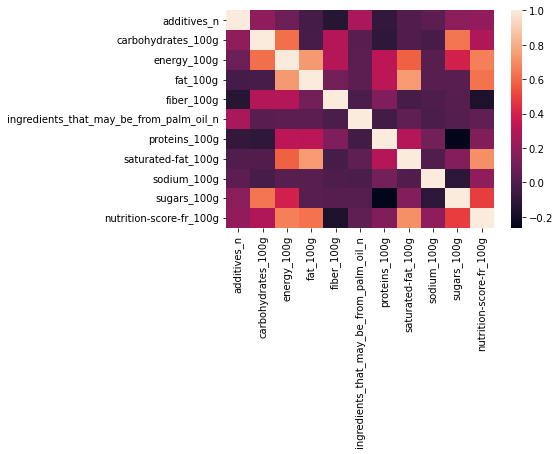

In [13]:
#Visualisation des corrélations par une HeatMap
sns.heatmap(mod_df4.corr());

On note plusieurs variables corrélées entre elles : 

      1) L'énergie avec le fat / les carbohydrates, (le nutriscore et la masse totale)

      2) Les sucres avec les carbohydrates (c'est normal par définition)

      3) Le fat avec le saturated-fat (et le nutriscore)

## Quid des distributions des variables ?


Nous avions déjà visualisé les distributions des variables par des graphiques / boîtes à moustaches, mais nous allons effectuer des tests statistiques pour vérifier nos hypothèses.

Notre jeu de données contient plus de 5000 individus, le test de Shapiro-Wilk n'est donc pas fiable pour tester la normalité de nos distributions. A titre d'entraînement, nous allons effectuer plusieurs test de normalité, nous ne retiendrons que le QQ-Plot pour la présentation, ce dernier ayant le bon goût d'être très visuel.

Pour chacun de ces tests, l'hypothèse nulle est la suivante : "La variable étudiée est normalement distribuée".

In [14]:
#Test de normalité d'Anderson
for column in objet_sup(mod_df4):
    result = scipy.stats.anderson(mod_df4[column], dist='norm')
    print(column)
    print(result)
    print('----------------\n')

additives_n
AndersonResult(statistic=9246.202829785267, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
----------------

carbohydrates_100g
AndersonResult(statistic=6475.740058680822, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
----------------

energy_100g
AndersonResult(statistic=2467.2085507102893, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
----------------

fat_100g
AndersonResult(statistic=9936.352514407889, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
----------------

fiber_100g
AndersonResult(statistic=10542.020467243856, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
----------------

ingredients_that_may_be_from_palm_o

On remarque que pour chacune de nos variables, le résultat du test donne une valeur bien plus grande que celle du seuil critique théorique (0.05). Nous pouvons donc rejetter l'hypothèse nulle.

In [15]:
# Test de normalité de Kolmogorov-Smirnov
for column in objet_sup(mod_df4):
    D, p = scipy.stats.kstest(mod_df4[column],'norm')
    print(column)
    print("Kolmogorov-Smirnov: D ={0} p ={1}".format(D, p))
    print('----------------\n')

additives_n
Kolmogorov-Smirnov: D =0.19790022291244963 p =0.0
----------------

carbohydrates_100g
Kolmogorov-Smirnov: D =0.1545192690672414 p =0.0
----------------

energy_100g
Kolmogorov-Smirnov: D =0.09808619920948841 p =0.0
----------------

fat_100g
Kolmogorov-Smirnov: D =0.20724196539560275 p =0.0
----------------

fiber_100g
Kolmogorov-Smirnov: D =0.22136395645948143 p =0.0
----------------

ingredients_that_may_be_from_palm_oil_n
Kolmogorov-Smirnov: D =0.5300640968007657 p =0.0
----------------

proteins_100g
Kolmogorov-Smirnov: D =0.1626075405097952 p =0.0
----------------

saturated-fat_100g
Kolmogorov-Smirnov: D =0.2425166999338661 p =0.0
----------------

sodium_100g
Kolmogorov-Smirnov: D =0.33369247062071833 p =0.0
----------------

sugars_100g
Kolmogorov-Smirnov: D =0.22189571134282793 p =0.0
----------------

nutrition-score-fr_100g
Kolmogorov-Smirnov: D =0.1229538069181878 p =0.0
----------------



La p-value, pour chacune des variables étudiées, est plus petite que 0.05. Nous rejetons donc l'hypothèse nulle.

additives_n


C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


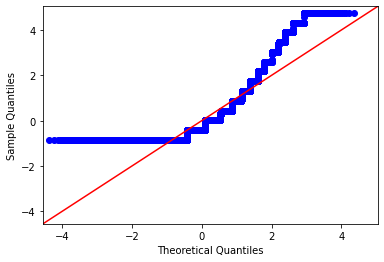

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


carbohydrates_100g


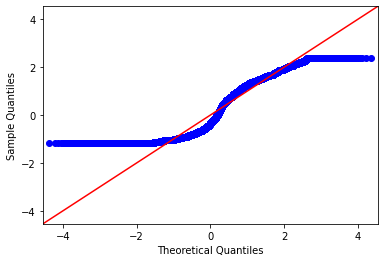

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


energy_100g


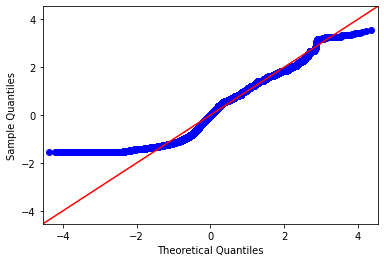

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


fat_100g


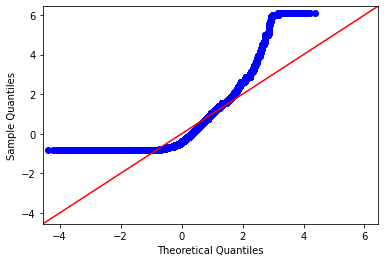

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


fiber_100g


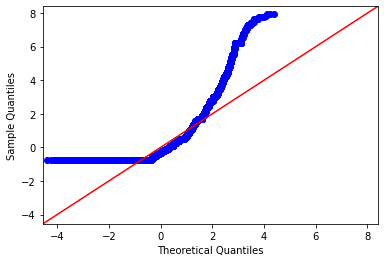

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


ingredients_that_may_be_from_palm_oil_n


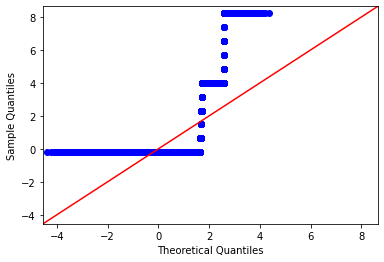

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


proteins_100g


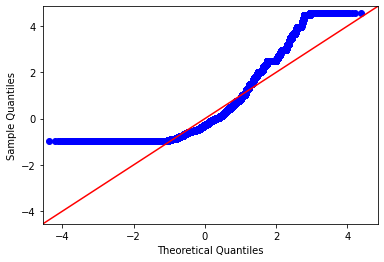

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


saturated-fat_100g


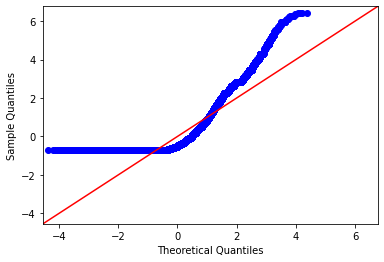

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


sodium_100g


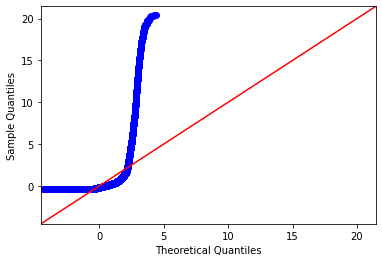

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


sugars_100g


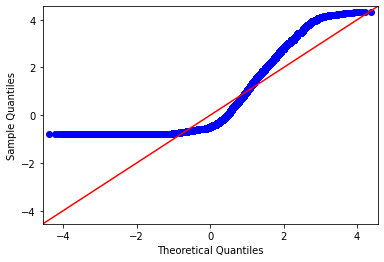

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


nutrition-score-fr_100g


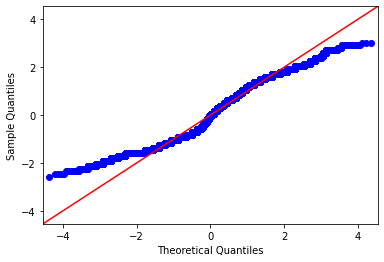

In [16]:
# QQPlots pour la non-normalité (plus visuel).

for column in objet_sup(mod_df4):
    sm.qqplot(mod_df4[column], line = '45')
    print(column)
    plt.show()

Nous remarquons qu'aucune de nos variables ne "fit" une distribution normale.

## Analyse en composantes principales

In [17]:
#Copie du dataframe pour des soucis de confort avant PCA.
mod_df4_pca = mod_df4.copy()
mod_df4_pca.head()

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g
0,16087,états-unis,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396
1,16094,états-unis,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632
2,16612,états-unis,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631
3,16650,états-unis,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627
4,16872,états-unis,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396


In [18]:
# Centrage / Réduction de nos données quantitatives
scaler = StandardScaler()
mod_df4_pca_scaled = scaler.fit_transform(objet_sup(mod_df4_pca).values)
mod_df4_pca_scaled

array([[-0.85466241, -0.52961483,  2.06183348, ...,  0.02424594,
        -0.57642785,  0.40716952],
       [-0.85466241,  1.58555161,  0.66669827, ..., -0.42676021,
        -0.70307933, -1.57858676],
       [-0.85466241,  1.06318257,  0.44217752, ..., -0.42600916,
        -0.57348491, -1.53445884],
       ...,
       [-0.85466241, -0.73156899, -0.72137654, ..., -0.02168941,
        -0.25953638, -0.14442945],
       [-0.85466241, -1.14903605, -1.49519647, ..., -0.41887418,
        -0.73776397, -0.69602841],
       [-0.85466241, -1.16687652, -1.52485015, ..., -0.42826231,
        -0.76404021, -0.916668  ]])

In [19]:
# Analyse en composantes principales

mod_df4_pca_done = decomposition.PCA(n_components=7).fit_transform(mod_df4_pca_scaled)
pd.DataFrame(mod_df4_pca_done, index = mod_df4_pca.index, columns = ["F"+str(i+1) for i in range(7)])

,F1,F2,F3,F4,F5,F6,F7
0,2.782665,2.415662,1.977573,0.650510,-0.565183,0.298735,0.811872
1,-0.729594,-0.682883,2.485353,0.618894,-0.291127,-0.099857,-0.318316
2,-0.411258,0.230622,4.269927,1.945075,-0.412906,-0.710158,-0.434511
3,-0.580415,-0.188788,1.589176,0.317462,0.046253,-0.651440,-1.261516
4,2.063401,1.425848,1.780577,0.853008,-0.112324,-0.101099,0.445983
...,...,...,...,...,...,...,...
162583,-0.670302,-1.351064,1.967356,0.135195,-0.148263,0.381823,-0.032129
162584,-0.362912,-0.366703,2.522857,0.861614,-0.050071,-0.357713,-0.562726
162585,0.166484,1.287169,-0.445975,-1.056866,-0.427615,1.077199,0.701509
162586,-2.473549,0.481562,-0.469774,-0.931031,-0.300927,0.566385,0.039590


In [20]:
mod_df4_pca_done_fit = decomposition.PCA(n_components=7).fit(mod_df4_pca_scaled)
var_exp = mod_df4_pca_done_fit.explained_variance_ratio_
var_exp

array([0.31152789, 0.17515927, 0.13038011, 0.10163566, 0.09415179,
       0.06635749, 0.05283373])

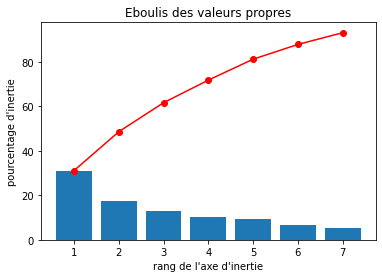

In [21]:
#Eboulis des valeurs propres
display_scree_plot(mod_df4_pca_done_fit)

Ici, nos sept composantes représentent 93 % de l'inertie totale.

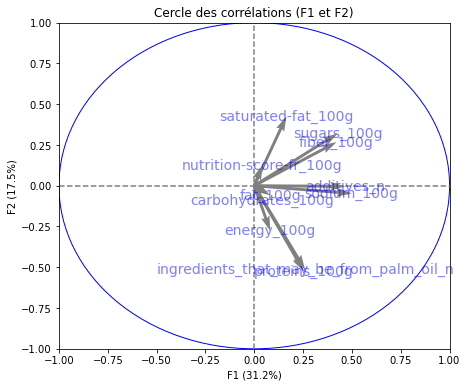

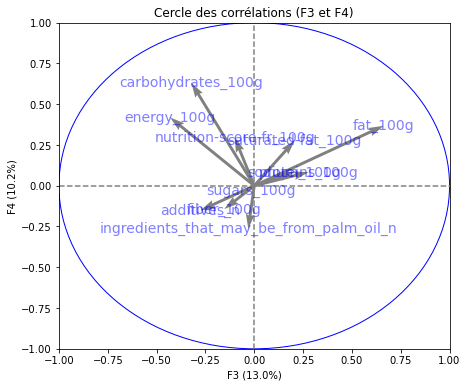

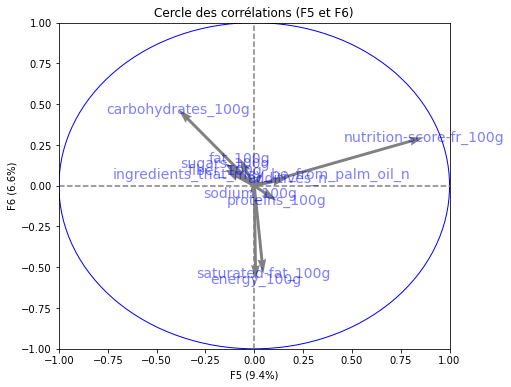

In [22]:
# Cercle des corrélations

variables = ['energy_100g','proteins_100g','sodium_100g','sugars_100g',
                'fat_100g','carbohydrates_100g','saturated-fat_100g','fiber_100g','nutrition-score-fr_100g',
                'ingredients_that_may_be_from_palm_oil_n','additives_n']
pcs = mod_df4_pca_done_fit.components_
display_circles(pcs, 7, mod_df4_pca_done_fit, [(0,1),(2,3),(4,5)], labels = np.array(variables))

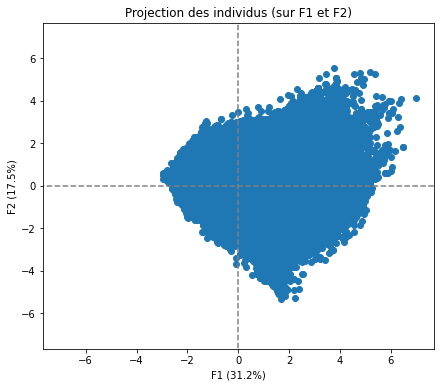

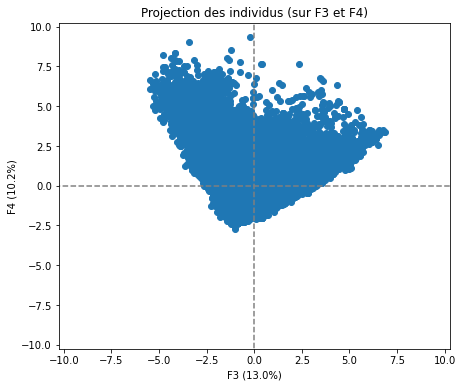

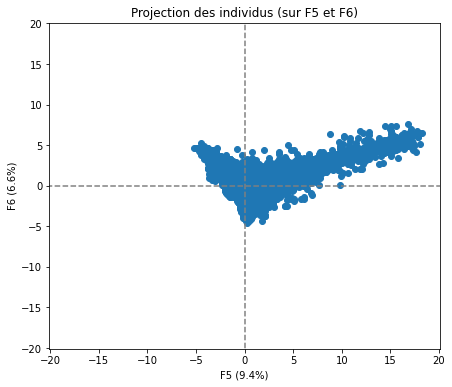

In [23]:
# Projection des individus
mod_df4_projected = mod_df4_pca_done_fit.transform(mod_df4_pca_scaled)
display_factorial_planes(mod_df4_projected, 7, mod_df4_pca_done_fit, [(0,1),(2,3),(4,5)], labels = None)

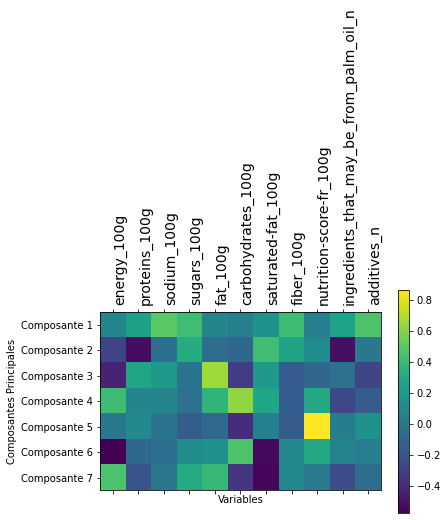

In [24]:
#HeatMap de l'impact de chacune des variables étudiées sur les axes principaux d'inertie
plt.matshow(mod_df4_pca_done_fit.components_,cmap='viridis');
plt.yticks([0,1,2,3,4,5,6], ['Composante 1', 'Composante 2','Composante 3','Composante 4', 'Composante 5','Composante 6',
                                   'Composante 7']);
plt.colorbar();
plt.xticks(range(len(variables)),variables, rotation = 90, fontsize=14, ha = 'left');
plt.xlabel('Variables');
plt.ylabel('Composantes Principales');

Le premier axe caractérise les produits avec une projection positive sur les additifs, le sel, le sucre et les fibres.
Cet axe correspond aux produits transformés "équilibrés" et bons pour la santé.


Le deuxième axe est porté par les variables saturated-fat_100g et le sucre, négativement porté par la variable protéine_100g. Cela correspond à des produits à éviter.

Le troisième axe est lié à la variable fat_100g.

Le quatrième axe est porté par les variables energy_100g, les glucides ainsi que le nutriscore, relatifs aux produits céréaliés.

Le cinquième axe est porté par le nutriscore uniquement, ce qui correspond à des produits sains et bruts (peu transformés)

Le sixième axe est porté par la variable glucide, négativement corrélé aux acides gras saturés ainsi qu'à l'énergie.

Le septième axe correspond aux produits avec du gras, du sucre (négativement corrélé aux glucides) et de l'energie, à éviter.

## Tests ANOVA

Ici, on regarde la variable nutriscore que l'on va caractériser, et segmenter, par intervalles qui correspondent aux notes: a, b, c, d, e. On travaille sur des données scalées, du coup nous adaptons les intervalles en fonction de la longueur de l'intervalle global des notes.
On regardera ainsi les moyennes des populations qui correspondent aux segments {a,b,c,d,e} pour chacune des variables quantitatives étudiée.

L'hypothèse nulle est la suivante : Les populations en question ont la même moyenne pour la variable quantitative étudiée.

In [25]:
#On crée cette colonne pour pouvoir effectuer un .cut (nécéssite des nombres entiers) et segmenter nos individus

mod_df4['nutrition-score-fr_100g x 1000']= mod_df4['nutrition-score-fr_100g']*1000
mod_df4.head()

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000
0,16087,états-unis,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396,391.396479
1,16094,états-unis,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632,-1588.631924
2,16612,états-unis,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631,-1544.631293
3,16650,états-unis,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627,-1258.627190
4,16872,états-unis,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396,391.396479


In [26]:
M = mod_df4['nutrition-score-fr_100g x 1000'].max()
m = mod_df4['nutrition-score-fr_100g x 1000'].min()
nutriscore_longueur = M - m
print(M , m, nutriscore_longueur)

3031.4343499366737 -2578.646125169023 5610.080475105697


In [27]:
# Les intervalles du .cut sont définis en fonction des intervalles de notes du Nutriscore.
intervalles =[int(m), 
              int(m +(15/56)*nutriscore_longueur),
              int(m +(18/56)*nutriscore_longueur),
              int(m +(26/56)*nutriscore_longueur),
              int(m +(34/56)*nutriscore_longueur),
              int(M)]

labels=['a','b','c','d','e']
mod_df4['segment'] = pd.cut(mod_df4['nutrition-score-fr_100g x 1000'], bins=intervalles, labels=labels)
mod_df4.head()

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000,segment
0,16087,états-unis,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396,391.396479,d
1,16094,états-unis,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632,-1588.631924,a
2,16612,états-unis,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631,-1544.631293,a
3,16650,états-unis,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627,-1258.627190,a
4,16872,états-unis,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396,391.396479,d


In [28]:
colonnes = mod_df4.columns[5:-3].tolist()
colonnes    

['additives_n',
 'carbohydrates_100g',
 'energy_100g',
 'fat_100g',
 'fiber_100g',
 'ingredients_that_may_be_from_palm_oil_n',
 'proteins_100g',
 'saturated-fat_100g',
 'sodium_100g',
 'sugars_100g']

In [29]:
#Test ANOVA pour les paires (nutriscore // variable)
F, p = stats.f_oneway(mod_df4.loc[mod_df4['segment'] == 'a',colonnes],
                      mod_df4.loc[mod_df4['segment'] == 'b',colonnes],
                      mod_df4.loc[mod_df4['segment'] == 'c',colonnes],
                      mod_df4.loc[mod_df4['segment'] == 'd',colonnes],
                      mod_df4.loc[mod_df4['segment'] == 'e',colonnes])
print(F)
print(p)

[ 2501.8752319   6110.87060407 34547.97200814 26773.89149584
  3018.72140106   242.13184922  2331.02154459 45628.29240088
  2062.62735589 11452.10294525]
[0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000
 0.0000000e+000 9.8700824e-208 0.0000000e+000 0.0000000e+000
 0.0000000e+000 0.0000000e+000]


La p-value pour chacun des test ANOVA {Segment / variable qualitative} est plus petite que 0.05. On peut donc rejeter l'hypothèse nulle, et ce pour chaque variable quantitative. Les résultats obtenus sont cependants soumis à une forme de biais : les données sur lesquelles nous agissons ne suivent pas une distribution normale.

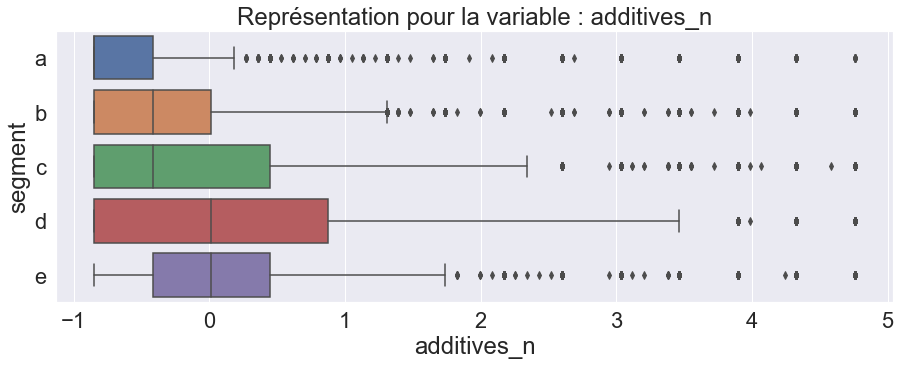

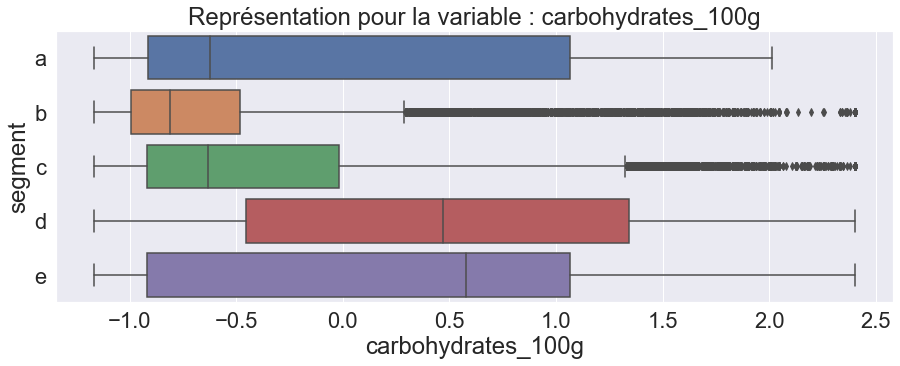

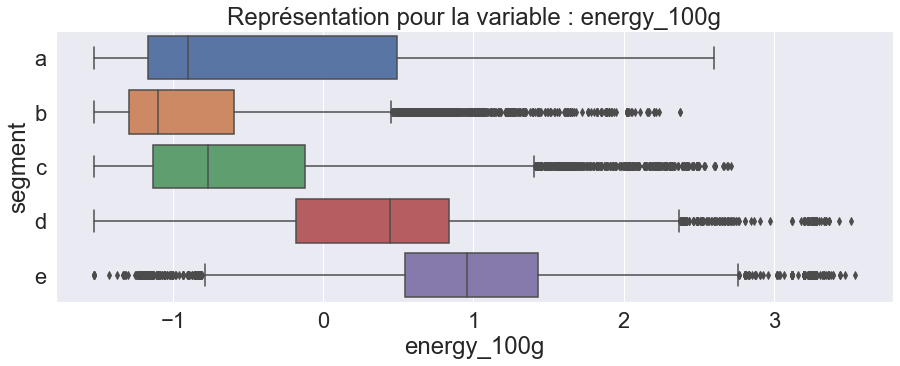

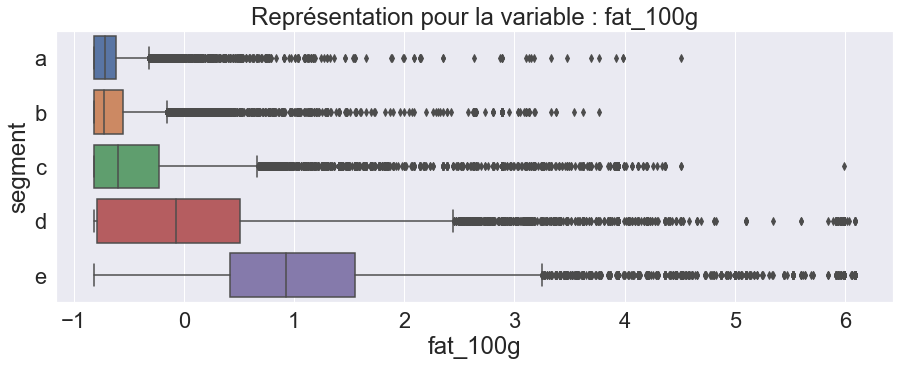

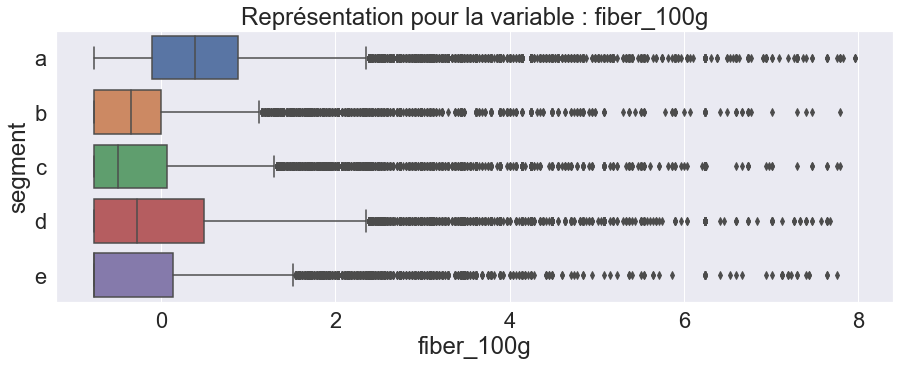

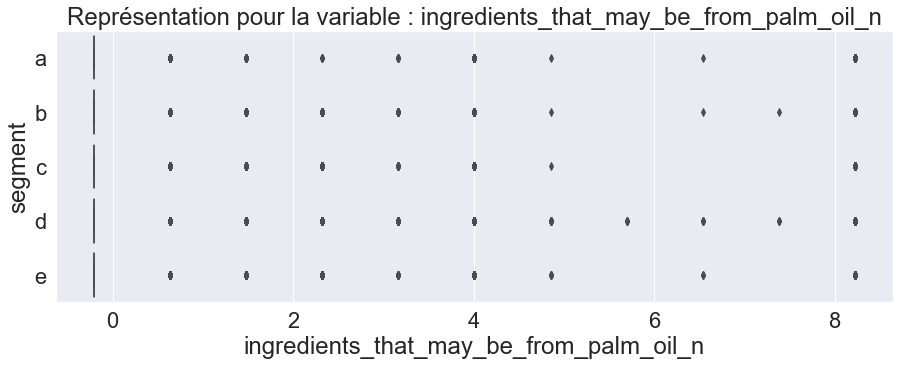

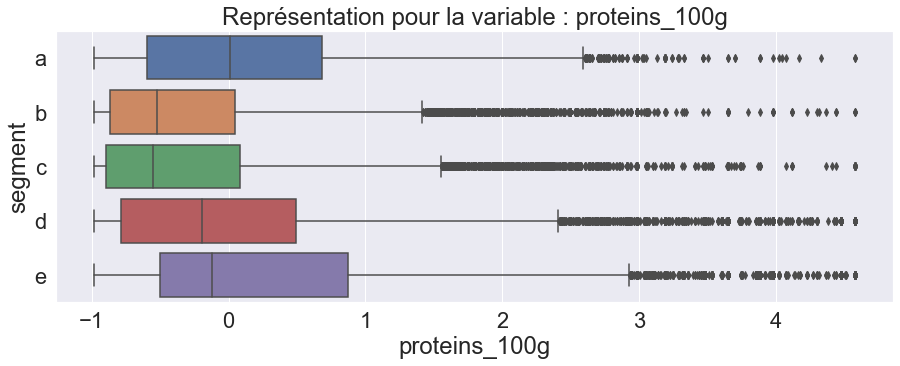

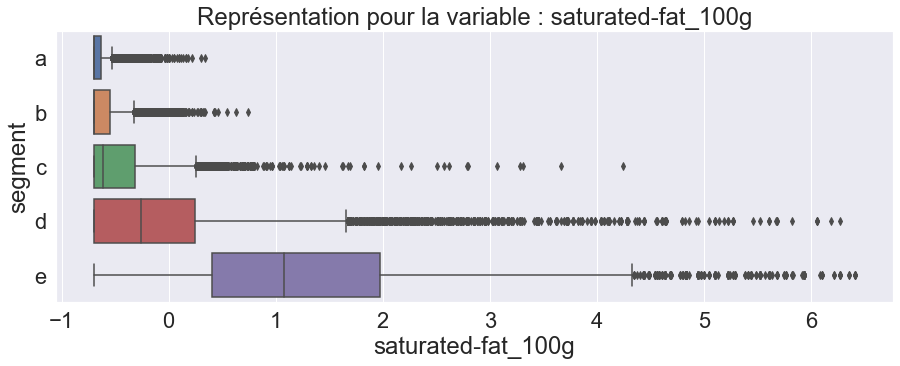

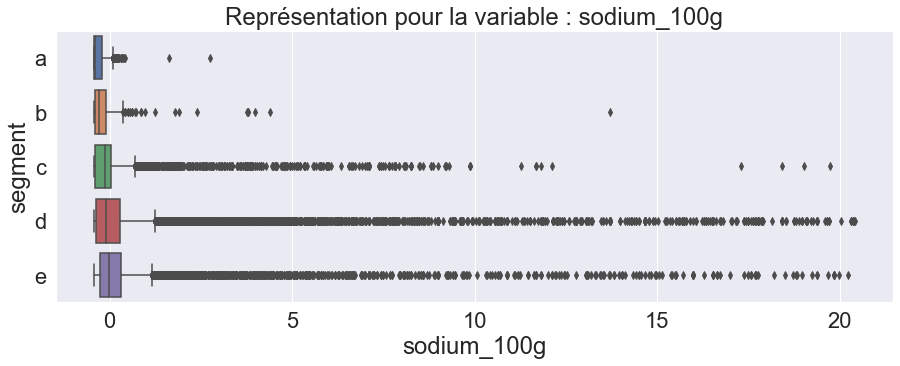

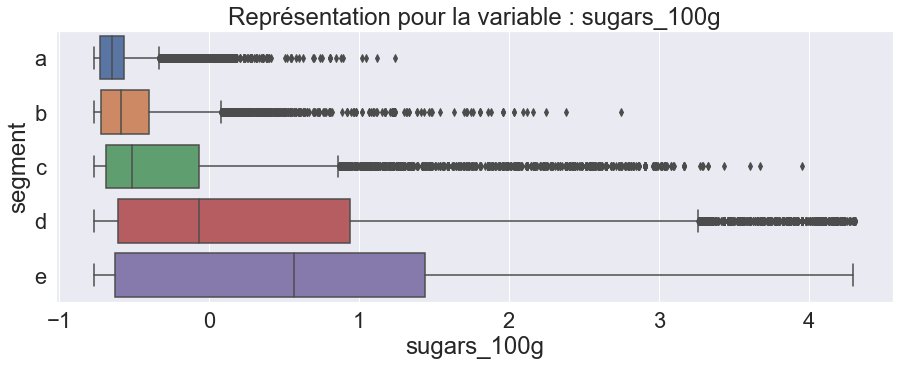

In [30]:
#Visualisation des données pour chaque segment, par variable quantitative.

sns.set(font_scale=2)
for column in colonnes:
    plt.figure(figsize = (15,5))
    
    sns.boxplot(y = mod_df4['segment'], x = mod_df4[column])
    
    plt.title('Représentation pour la variable : ' + column)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)


## Influence des pnns_group_1 et pnns_groups_2 sur le nutriscore

In [31]:
mod_df4['pnns_groups_1'].value_counts()

unknown                    134226
cereals and potatoes         5468
sugary snacks                5223
composite foods              3589
fruits and vegetables        3082
beverages                    2888
milk and dairy products      2883
fish meat eggs               2180
salty snacks                 1550
fat and sauces               1499
Name: pnns_groups_1, dtype: int64

In [32]:
mod_df4['pnns_groups_2'].value_counts()

unknown                             134178
one-dish meals                        3038
cereals                               2600
biscuits and cakes                    2472
vegetables                            1707
chocolate products                    1350
dressings and sauces                  1323
milk and yogurt                       1252
sweets                                1218
appetizers                            1215
bread                                 1183
breakfast cereals                     1134
non-sugared beverages                  962
fruit juices                           875
cheese                                 864
fruits                                 855
sweetened beverages                    838
fish and seafood                       828
processed meat                         821
legumes                                487
meat                                   454
dairy desserts                         384
ice cream                              383
nuts       

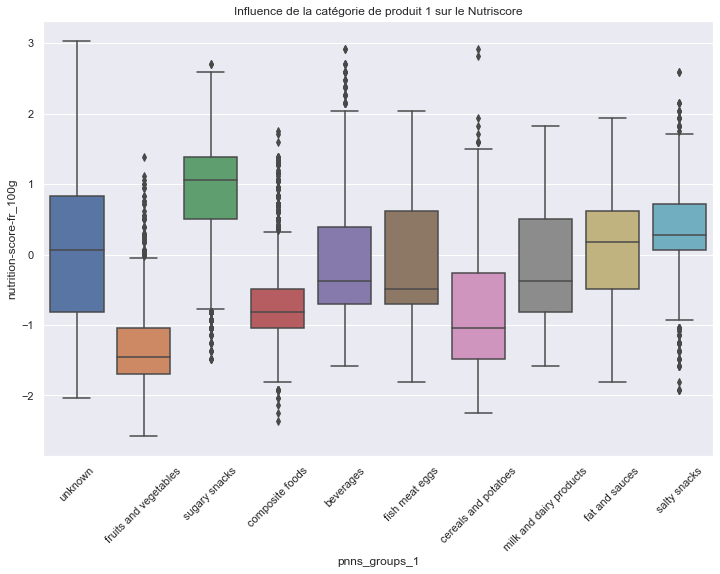

In [33]:
# Visualisation de la répartition des nutri-score par groupe de produits (1)
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=mod_df4, x='pnns_groups_1', y='nutrition-score-fr_100g')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit 1 sur le Nutriscore")
plt.show()


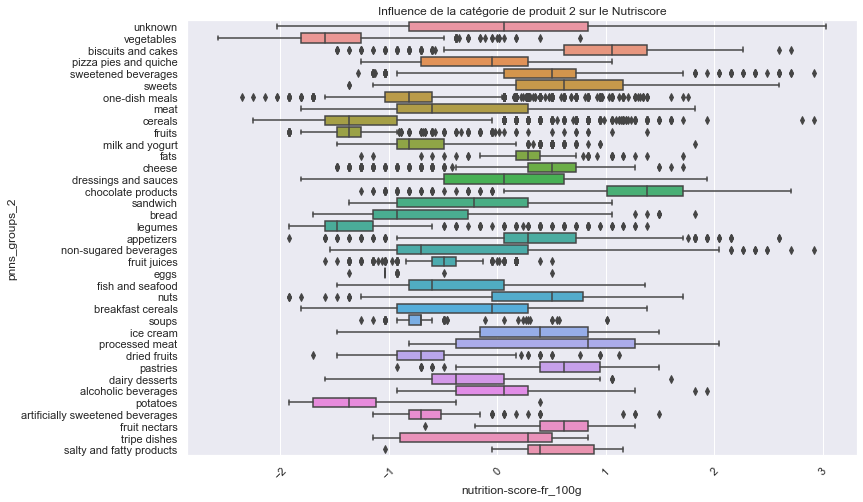

In [34]:
# Visualisation de la répartition des nutri-score par groupe de produits (1)
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=mod_df4, x='nutrition-score-fr_100g', y='pnns_groups_2')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit 2 sur le Nutriscore")
plt.show()

On remarque clairement une différence de répartition des nutriscores en fonction de la catégorie de produit, ce qui semble conforme à l'intuition. Nous allons effectuer un test Khi-2 entre les variables catégrorielles pnns_groups_1 (puis pnns_groups_2) et la segmentation.

## Tableau de contingence et test du Khi-2

L'hypothèse nulle du 1er test est la suivante : 'segment' et 'pnns_groups_1' sont indépendantes.

L'hypothèse nulle du 2ème test est la suivante : ' segment' et 'pnns-groups_2' sont indépendantes.

In [35]:
# Fonction pour créer un tableau de contingence
def cont(X,Y, data):
   return data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

In [36]:
cont('segment', 'pnns_groups_1', mod_df4)

pnns_groups_1,beverages,cereals and potatoes,composite foods,fat and sauces,fish meat eggs,fruits and vegetables,milk and dairy products,salty snacks,sugary snacks,unknown,Total
segment,,,,,,,,,,,
a,141,2690,765,62,176,2208,175,39,19,17230,23505
b,567,1034,1157,109,324,417,611,50,111,22422,26802
c,1118,802,1121,462,749,411,918,295,341,26096,32313
d,731,766,466,579,445,36,847,802,1528,33777,39977
e,331,176,80,287,486,9,332,364,3224,34698,39987
Total,2888,5468,3589,1499,2180,3081,2883,1550,5223,134223,162584


In [37]:
#Test Khi-2 pour discuter de l'indépendance de deux variables qualitatives, ici 'segment' et les 'pnns_groups_1'

chi2, p_val, dof, exp = chi2_contingency(cont('segment', 'pnns_groups_1', mod_df4))
print("Chi-2: Chi-2 ={0}, p_val ={1}, dof ={2}, exp ={3} ".format(chi2, p_val, dof, exp))

Chi-2: Chi-2 =24450.877899308703, p_val =0.0, dof =50, exp =[[   417.52226541    790.51653299    518.86683191    216.71256089
     315.16569896    445.42454977    416.79940831    224.08570339
     755.09653471  19404.80991364  23505.        ]
 [   476.08729026    901.40072824    591.64725926    247.11040447
     359.37337007    507.90337303    475.26303941    255.51776313
     861.01243665  22126.68433548  26802.        ]
 [   573.97987502   1086.74582985    713.3011674     297.92099469
     433.26735718    612.33794838    572.98614255    308.05706589
    1038.05293879  26676.35068026  32313.        ]
 [   710.11646903   1344.50029523    882.481997      368.58192073
     536.02974462    757.57231339    708.88704301    381.12206613
    1284.25842026  33003.4497306   39977.        ]
 [   710.29410028   1344.83661369    882.70274443    368.67411922
     536.16382916    757.76181543    709.06436673    381.21740147
    1284.57966959  33011.70534001  39987.        ]
 [  2888.           5468.

La p-value est plus petite que 0.05 : l'hypothèse nulle est donc rejetée, les variables qualitatives segment et pnns_groups_1 ne sont donc pas indépendantes.

In [38]:
cont('segment', 'pnns_groups_2', mod_df4)

pnns_groups_2,alcoholic beverages,appetizers,artificially sweetened beverages,biscuits and cakes,bread,breakfast cereals,cereals,cheese,chocolate products,dairy desserts,dressings and sauces,dried fruits,eggs,fats,fish and seafood,fruit juices,fruit nectars,fruits,ice cream,legumes,meat,milk and yogurt,non-sugared beverages,nuts,one-dish meals,pastries,pizza pies and quiche,potatoes,processed meat,salty and fatty products,sandwich,soups,sweetened beverages,sweets,tripe dishes,unknown,vegetables,Total
segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,NaN,18.0,2.0,12.0,323.0,212.0,1730.0,54.0,3.0,21.0,60.0,38.0,1.0,2.0,100.0,35.0,NaN,746.0,1.0,377.0,75.0,99.0,86.0,21.0,734.0,NaN,2.0,48.0,NaN,NaN,29.0,2.0,18.0,4.0,1.0,17229.0,1422.0,23505
b,1.0,39.0,59.0,27.0,444.0,142.0,406.0,34.0,25.0,28.0,109.0,73.0,74.0,NaN,176.0,50.0,NaN,41.0,4.0,35.0,69.0,545.0,384.0,10.0,1048.0,1.0,43.0,7.0,5.0,1.0,66.0,122.0,74.0,58.0,8.0,22413.0,181.0,26802
c,12.0,238.0,65.0,120.0,242.0,330.0,204.0,77.0,19.0,228.0,451.0,127.0,1.0,11.0,341.0,741.0,13.0,56.0,116.0,18.0,166.0,497.0,204.0,56.0,964.0,21.0,93.0,8.0,241.0,1.0,64.0,130.0,95.0,181.0,1.0,26083.0,98.0,32313
d,9.0,639.0,8.0,732.0,156.0,407.0,164.0,506.0,163.0,91.0,434.0,13.0,1.0,145.0,185.0,49.0,41.0,8.0,143.0,38.0,105.0,107.0,179.0,155.0,225.0,95.0,129.0,1.0,154.0,8.0,112.0,10.0,454.0,538.0,11.0,33757.0,5.0,39977
e,4.0,281.0,4.0,1581.0,18.0,43.0,96.0,193.0,1140.0,16.0,269.0,3.0,NaN,18.0,26.0,NaN,21.0,4.0,119.0,19.0,39.0,4.0,109.0,79.0,67.0,66.0,6.0,NaN,421.0,4.0,7.0,2.0,197.0,437.0,1.0,34693.0,NaN,39987
Total,26.0,1215.0,138.0,2472.0,1183.0,1134.0,2600.0,864.0,1350.0,384.0,1323.0,254.0,77.0,176.0,828.0,875.0,75.0,855.0,383.0,487.0,454.0,1252.0,962.0,321.0,3038.0,183.0,273.0,64.0,821.0,14.0,278.0,266.0,838.0,1218.0,22.0,134175.0,1706.0,162584


In [39]:
cont('segment', 'pnns_groups_2', mod_df4).fillna(0)

pnns_groups_2,alcoholic beverages,appetizers,artificially sweetened beverages,biscuits and cakes,bread,breakfast cereals,cereals,cheese,chocolate products,dairy desserts,dressings and sauces,dried fruits,eggs,fats,fish and seafood,fruit juices,fruit nectars,fruits,ice cream,legumes,meat,milk and yogurt,non-sugared beverages,nuts,one-dish meals,pastries,pizza pies and quiche,potatoes,processed meat,salty and fatty products,sandwich,soups,sweetened beverages,sweets,tripe dishes,unknown,vegetables,Total
segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,0.0,18.0,2.0,12.0,323.0,212.0,1730.0,54.0,3.0,21.0,60.0,38.0,1.0,2.0,100.0,35.0,0.0,746.0,1.0,377.0,75.0,99.0,86.0,21.0,734.0,0.0,2.0,48.0,0.0,0.0,29.0,2.0,18.0,4.0,1.0,17229.0,1422.0,23505
b,1.0,39.0,59.0,27.0,444.0,142.0,406.0,34.0,25.0,28.0,109.0,73.0,74.0,0.0,176.0,50.0,0.0,41.0,4.0,35.0,69.0,545.0,384.0,10.0,1048.0,1.0,43.0,7.0,5.0,1.0,66.0,122.0,74.0,58.0,8.0,22413.0,181.0,26802
c,12.0,238.0,65.0,120.0,242.0,330.0,204.0,77.0,19.0,228.0,451.0,127.0,1.0,11.0,341.0,741.0,13.0,56.0,116.0,18.0,166.0,497.0,204.0,56.0,964.0,21.0,93.0,8.0,241.0,1.0,64.0,130.0,95.0,181.0,1.0,26083.0,98.0,32313
d,9.0,639.0,8.0,732.0,156.0,407.0,164.0,506.0,163.0,91.0,434.0,13.0,1.0,145.0,185.0,49.0,41.0,8.0,143.0,38.0,105.0,107.0,179.0,155.0,225.0,95.0,129.0,1.0,154.0,8.0,112.0,10.0,454.0,538.0,11.0,33757.0,5.0,39977
e,4.0,281.0,4.0,1581.0,18.0,43.0,96.0,193.0,1140.0,16.0,269.0,3.0,0.0,18.0,26.0,0.0,21.0,4.0,119.0,19.0,39.0,4.0,109.0,79.0,67.0,66.0,6.0,0.0,421.0,4.0,7.0,2.0,197.0,437.0,1.0,34693.0,0.0,39987
Total,26.0,1215.0,138.0,2472.0,1183.0,1134.0,2600.0,864.0,1350.0,384.0,1323.0,254.0,77.0,176.0,828.0,875.0,75.0,855.0,383.0,487.0,454.0,1252.0,962.0,321.0,3038.0,183.0,273.0,64.0,821.0,14.0,278.0,266.0,838.0,1218.0,22.0,134175.0,1706.0,162584


In [40]:
#Test Khi-2 pour discuter de l'indépendance de deux variables qualitatives, ici 'segment' et les 'pnns_groups_2'
chi2, p_val, dof, exp = chi2_contingency(cont('segment', 'pnns_groups_2', mod_df4).fillna(0))
print("Chi-2: Chi-2 ={0}, p_val ={1}, dof ={2}, exp ={3} ".format(chi2, p_val, dof, exp))

Chi-2: Chi-2 =36860.803956710384, p_val =0.0, dof =185, exp =[[3.75885696e+00 1.75654277e+02 1.99508562e+01 3.57380554e+02
  1.71027992e+02 1.63943992e+02 3.75885696e+02 1.24909708e+02
  1.95171419e+02 5.55154259e+01 1.91267991e+02 3.67211411e+01
  1.11319995e+01 2.54445702e+01 1.19705137e+02 1.26499994e+02
  1.08428566e+01 1.23608565e+02 5.53708545e+01 7.04062823e+01
  6.56354254e+01 1.81003420e+02 1.39077708e+02 4.64074263e+01
  4.39207979e+02 2.64565701e+01 3.94679981e+01 9.25257098e+00
  1.18693137e+02 2.02399990e+00 4.01908552e+01 3.84559981e+01
  1.21150851e+02 1.76087991e+02 3.18057127e+00 1.93978705e+04
  2.46638845e+02 2.35050000e+04]
 [4.28610441e+00 2.00292956e+02 2.27493234e+01 4.07509620e+02
  1.95017751e+02 1.86940093e+02 4.28610441e+02 1.42430547e+02
  2.22547729e+02 6.33024652e+01 2.18096775e+02 4.18719431e+01
  1.26934631e+01 2.90136299e+01 1.36495941e+02 1.44243899e+02
  1.23637627e+01 1.40946895e+02 6.31376150e+01 8.02820327e+01
  7.48419771e+01 2.06392413e+02 1.5858

La p-value est plus petite que 0.05 : l'hypothèse nulle est donc rejetée, les variables qualitatives segment et pnns_groups_2 ne sont donc pas indépendantes.

### Travaux d'exploration autour de la distribution des produits / fabrication en France

In [41]:
##Isolement des produits dont le pays de distribution est inconnu
mod_df4_dist_inconnue = mod_df4[mod_df4['countries_fr'].str.contains('unknown', na=False)]


In [42]:
mod_df4_dist_inconnue.shape

(0, 18)

In [45]:
#Isolement des produits distribués en France et nettoyage.
mod_df4_distribution_france = mod_df4[mod_df4['countries_fr'].str.contains('france', na=False)|
                           mod_df4['countries_fr'].str.contains('francia', na=False)|
                           mod_df4['countries_fr'].str.contains('frankreich', na=False)|
                           mod_df4['countries_fr'].str.contains('frankrijk', na=False)|
                           mod_df4['countries_fr'].str.contains('française', na=False)]

mod_df4_distribution_france['countries_fr'] ='france'
mod_df4_distribution_france.shape

C:\Users\alexa\AppData\Local\Temp/ipykernel_18640/1285964133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df4_distribution_france['countries_fr'] ='france'


(26332, 18)

In [46]:
mod_df4_distribution_france['countries_fr'].value_counts()

france    26332
Name: countries_fr, dtype: int64

In [47]:
mod_df4_distribution_france.head()

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000,segment
43,36252,france,unknown,unknown,unknown,-0.417751,1.330790,1.133968,0.663902,0.108716,-0.206947,-0.636196,1.375485,-0.393919,2.250918,1.491412,1491.412259,e
60,39529,france,unknown,unknown,unknown,-0.245194,1.583411,0.566300,-0.507463,1.405655,-0.206947,-0.114793,-0.598692,-0.285892,0.379709,-0.158611,-158.611410,c
102,40608754,france,unknown,beverages,sweetened beverages,0.013643,-0.795795,-1.275091,-0.816028,-0.767595,-0.206947,-0.983798,-0.698230,-0.420313,-0.220173,0.501398,501.398057,d
104,10,france,unknown,sugary snacks,biscuits and cakes,1.307824,0.795575,1.157974,0.885892,-0.241809,4.008747,-0.149553,-0.283487,-0.184800,0.598278,0.391396,391.396479,d
116,30,france,france,sugary snacks,biscuits and cakes,1.307824,0.831256,0.971575,0.589906,-0.136651,4.008747,-0.177361,-0.283487,-0.188511,0.703207,0.501398,501.398057,d


In [48]:
list_index_distrib = list(mod_df4_distribution_france.index.values)
list_index_distrib

[43,
 60,
 102,
 104,
 116,
 126,
 127,
 202,
 208,
 209,
 210,
 211,
 221,
 224,
 225,
 228,
 251,
 266,
 281,
 290,
 347,
 403,
 524,
 529,
 4293,
 4401,
 4782,
 4785,
 6405,
 6451,
 6574,
 6675,
 6932,
 7475,
 7476,
 7477,
 7480,
 7481,
 7484,
 7827,
 8642,
 8694,
 8695,
 8704,
 8706,
 8708,
 8711,
 8712,
 8719,
 8720,
 8721,
 8723,
 8724,
 8725,
 8726,
 8728,
 8735,
 8740,
 8745,
 8801,
 9799,
 10116,
 10117,
 10120,
 10167,
 10614,
 10977,
 10979,
 11143,
 12812,
 13163,
 13164,
 13165,
 13166,
 13167,
 13168,
 13170,
 13171,
 13741,
 13946,
 13958,
 14094,
 14095,
 14112,
 14114,
 14145,
 14146,
 14378,
 14736,
 14831,
 15388,
 15550,
 17324,
 17437,
 18715,
 18726,
 19024,
 19388,
 19397,
 19403,
 19885,
 19895,
 20068,
 20113,
 20115,
 20118,
 20119,
 20489,
 20738,
 22144,
 23939,
 24027,
 24029,
 24128,
 24451,
 24452,
 24479,
 24777,
 24845,
 24854,
 24879,
 24881,
 24885,
 24887,
 24893,
 24914,
 25078,
 25701,
 25738,
 25970,
 31262,
 35636,
 37739,
 37743,
 37769,
 37770,

In [49]:
#Création d'un sous-dataframe qui contient tous les produits qui ne sont pas fabriqués en france, par "soustraction"
sub_distrib_mod_df_4 = mod_df4.drop(list_index_distrib)

sub_distrib_mod_df_4['countries_fr'] = 'not france'
sub_distrib_mod_df_4['countries_fr'].value_counts()

not france    136256
Name: countries_fr, dtype: int64

In [50]:
sub_distrib_mod_df_4[sub_distrib_mod_df_4.duplicated()].sort_values(by='code').head(20)

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000,segment
148616,70650600028,not france,unknown,unknown,unknown,1.307824,1.057830,0.282466,-0.554821,0.073663,-0.206947,-0.328916,-0.600351,-0.052681,-0.395405,-0.598618,-598.617722,c
148697,72101011766,not france,unknown,unknown,unknown,-0.417751,-0.928885,-1.330164,-0.816028,-0.767595,-0.206947,-0.983798,-0.698230,0.387534,-0.591099,0.061392,61.391745,d
149089,75925300481,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,2.492220,2.856947,0.142446,-0.765807,1.271409,1271.409103,e
149091,75925300894,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,1.995845,2.264694,0.277245,-0.765807,1.491412,1491.412259,e
149094,75925300931,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,1.995845,2.856947,0.176382,-0.765807,1.381411,1381.410681,e
149098,75925301044,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,2.492220,2.264694,0.210317,-0.765807,1.381411,1381.410681,e
149099,75925301051,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,2.492220,2.856947,0.142446,-0.765807,1.271409,1271.409103,e
149102,75925301099,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,1.995845,2.856947,0.243309,-0.765807,1.381411,1381.410681,e
149103,75925301112,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,2.492220,2.856947,0.210317,-0.578507,1.381411,1381.410681,e
149105,75925301648,not france,unknown,unknown,unknown,-0.849145,-1.039496,0.796474,1.562220,-0.767595,-0.206947,2.492220,2.264694,0.176382,-0.765807,1.381411,1381.410681,e


In [51]:
#Création par collage du dataframe complet, mais annoté en 'france' / 'pas france'.
distribution_mod_df4_complet = pd.concat([sub_distrib_mod_df_4, mod_df4_distribution_france])
distribution_mod_df4_complet

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000,segment
0,16087,not france,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396,391.396479,d
1,16094,not france,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632,-1588.631924,a
2,16612,not france,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631,-1544.631293,a
3,16650,not france,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627,-1258.627190,a
4,16872,not france,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396,391.396479,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162574,9588400178181,france,unknown,unknown,unknown,-0.504030,1.651918,0.689153,-0.660636,1.475760,-0.206947,-0.191265,-0.499153,-0.407473,2.801798,0.171393,171.393323,d
162575,96068779,france,unknown,sugary snacks,sweets,0.876430,2.253856,-0.088919,-0.719833,-0.765842,4.008747,-0.978236,-0.485882,-0.427884,-0.759511,-0.488616,-488.616144,c
162580,96118580,france,unknown,sugary snacks,sweets,1.307824,2.233874,-0.069150,-0.719833,-0.252324,4.008747,-0.983241,-0.485882,-0.429369,-0.760560,-0.708619,-708.619300,c
162584,9847548283004,france,france,cereals and potatoes,bread,-0.762867,1.502058,0.795062,-0.608838,1.300498,-0.206947,0.823732,-0.598692,-0.177378,-0.629398,-1.368629,-1368.628768,a


In [52]:
# Test Khi-2 pour regarder le comportement des deux variables qualitatives 'segment' et 'countries_fr', c'est-à-dire l'influence
# du caractère 'distribué en france' sur le nutrigrade
cont('segment', 'countries_fr', distribution_mod_df4_complet)

countries_fr,france,not france,Total
segment,,,
a,5439,18066,23505
b,4215,22587,26802
c,5893,26420,32313
d,5874,34103,39977
e,4910,35077,39987
Total,26331,136253,162584


In [53]:
chi2, p_val, dof, exp = chi2_contingency(cont('segment', 'countries_fr', distribution_mod_df4_complet))
print("Chi-2: Chi-2 ={0}, p_val ={1}, dof ={2}, exp ={3} ".format(chi2, p_val, dof, exp))

Chi-2: Chi-2 =1457.0944295063618, p_val =4.655561894197992e-307, dof =10, exp =[[  3806.71010062  19698.28989938  23505.        ]
 [  4340.66981991  22461.33018009  26802.        ]
 [  5233.19393667  27079.80606333  32313.        ]
 [  6474.40330537  33502.59669463  39977.        ]
 [  6476.02283743  33510.97716257  39987.        ]
 [ 26331.         136253.         162584.        ]] 


La p-value est inférieure à 0.05, les variables 'segment' et 'countries_fr' ne sont donc pas indépendantes.

In [54]:
distribution_mod_df4_complet.head()

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000,segment
0,16087,not france,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396,391.396479,d
1,16094,not france,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632,-1588.631924,a
2,16612,not france,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631,-1544.631293,a
3,16650,not france,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627,-1258.627190,a
4,16872,not france,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396,391.396479,d


In [55]:
# Test ANOVA en prenant le nutriscore à la place du 'segment'

F, p = stats.f_oneway(distribution_mod_df4_complet.loc[distribution_mod_df4_complet['countries_fr'] == 'france',
                                                       ['nutrition-score-fr_100g']],
                      distribution_mod_df4_complet.loc[distribution_mod_df4_complet['countries_fr'] == 'not france',
                                                       ['nutrition-score-fr_100g']])
print(F)
print(p)

[1313.11131558]
[2.24383761e-286]


La p-value est inférieure à 0.05, les variables 'nutrition-score-fr_100g' et 'countries_fr' ne sont donc pas indépendantes. 

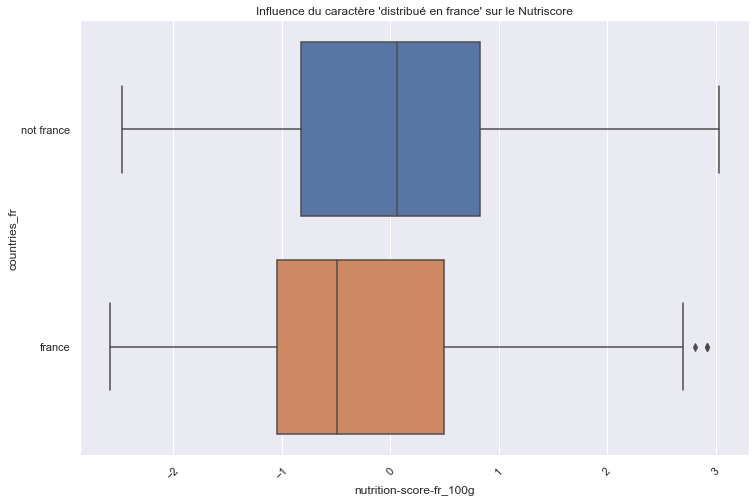

In [56]:
# Visualisation de la répartition des nutri-score en fonction du caratère 'distribué en France' (1)
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=distribution_mod_df4_complet, x='nutrition-score-fr_100g', y='countries_fr')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence du caractère 'distribué en france' sur le Nutriscore")
plt.show()


------------------------------------------------------------------------------------------------------------------------

In [57]:
##Isolement des produits dont le pays de fabrication est inconnu
mod_df4_fab_inconnue = mod_df4[mod_df4['manufacturing_places_tags'].str.contains('unknown', na=False)]


In [58]:
mod_df4_fab_inconnue['manufacturing_places_tags'].value_counts()

unknown    147986
Name: manufacturing_places_tags, dtype: int64

In [59]:
list_index_fab_inconnue = list(mod_df4_fab_inconnue.index.values)
list_index_fab_inconnue

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 

In [60]:
##Isolement des produits fabriqués en France et nettoyage.
mod_df4_fab_france = mod_df4[mod_df4['manufacturing_places_tags'].str.contains('france', na=False)|
                           mod_df4['manufacturing_places_tags'].str.contains('francia', na=False)|
                           mod_df4['manufacturing_places_tags'].str.contains('frankreich', na=False)|
                           mod_df4['manufacturing_places_tags'].str.contains('francaise', na=False)]
mod_df4_fab_france['manufacturing_places_tags'] ='france'
mod_df4_fab_france.shape

C:\Users\alexa\AppData\Local\Temp/ipykernel_18640/1541278954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df4_fab_france['manufacturing_places_tags'] ='france'


(7372, 18)

In [61]:
mod_df4['manufacturing_places_tags'].value_counts()

unknown                                                                                                                              147986
france                                                                                                                                 3787
italie                                                                                                                                  703
suisse                                                                                                                                  519
belgique                                                                                                                                390
                                                                                                                                      ...  
belgique,thailande                                                                                                                        1
delifrance-sa-filial

In [62]:
mod_df4_fab_france['manufacturing_places_tags'].value_counts()

france    7372
Name: manufacturing_places_tags, dtype: int64

In [63]:
list_index_fab = list(mod_df4_fab_france.index.values)
list_index_fab

[116,
 126,
 127,
 202,
 224,
 475,
 6573,
 6574,
 7028,
 8801,
 13164,
 13171,
 14799,
 38938,
 44081,
 74733,
 76554,
 76573,
 76596,
 76642,
 76650,
 76836,
 77268,
 77510,
 77519,
 77597,
 77782,
 77802,
 77817,
 78162,
 78215,
 83862,
 83897,
 90496,
 95211,
 95801,
 100832,
 119633,
 119644,
 119668,
 119707,
 119718,
 119719,
 119723,
 119724,
 119725,
 119726,
 119728,
 119729,
 119730,
 119733,
 119740,
 119743,
 119744,
 119749,
 119768,
 119781,
 119782,
 119794,
 119804,
 119811,
 119815,
 119816,
 119817,
 119819,
 119820,
 119823,
 119824,
 119829,
 119830,
 119836,
 119844,
 119845,
 119849,
 119851,
 119852,
 119854,
 119860,
 119863,
 119864,
 119865,
 119866,
 119867,
 119868,
 119871,
 119872,
 119873,
 119876,
 119877,
 119880,
 119882,
 119885,
 119889,
 119891,
 119892,
 119893,
 119894,
 119897,
 119899,
 119900,
 119901,
 119904,
 119906,
 119909,
 119910,
 119911,
 119912,
 119916,
 119918,
 119919,
 119925,
 119926,
 119927,
 119930,
 119934,
 119938,
 119940,

In [64]:
mod_df4.shape

(162588, 18)

In [65]:
#Création d'un sous-dataframe qui contient tous les produits qui ne sont pas fabriqués en france (mais renseignés quand même),
#par "soustraction"
sub_fab_mod_df_4 = mod_df4.drop(list_index_fab)
sub_fab_mod_df_4 = sub_fab_mod_df_4.drop(list_index_fab_inconnue)
sub_fab_mod_df_4.shape

(7230, 18)

In [66]:
sub_fab_mod_df_4['manufacturing_places_tags'] = 'not france'
sub_fab_mod_df_4['manufacturing_places_tags'].value_counts()

not france    7230
Name: manufacturing_places_tags, dtype: int64

In [67]:
#Création par collage du dataframe complet, mais annoté en 'france' / 'pas france'.
fabrication_mod_df4_complet = pd.concat([mod_df4_fab_inconnue, sub_fab_mod_df_4, mod_df4_fab_france])
fabrication_mod_df4_complet

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000,segment
0,16087,états-unis,unknown,unknown,unknown,-0.849145,-0.529615,2.061724,3.412133,1.721127,-0.206947,1.499470,0.190979,0.024616,-0.578507,0.391396,391.396479,d
1,16094,états-unis,unknown,unknown,unknown,-0.849145,1.585552,0.666560,-0.710213,1.230393,-0.206947,0.207781,-0.678322,-0.428232,-0.704947,-1.588632,-1588.631924,a
2,16612,états-unis,unknown,unknown,unknown,-0.849145,1.063183,0.442034,-0.739072,3.613958,-0.206947,2.203016,-0.682304,-0.427477,-0.575569,-1.544631,-1544.631293,a
3,16650,états-unis,unknown,unknown,unknown,-0.849145,1.462096,0.649614,-0.686534,-0.136651,-0.206947,0.968334,-0.676332,-0.240304,-0.695189,-1.258627,-1258.627190,a
4,16872,états-unis,unknown,unknown,unknown,-0.417751,0.141544,1.623970,1.897424,1.580917,-0.206947,1.334011,0.131256,0.166955,-0.591099,0.391396,391.396479,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161386,8712566248186,royaume-uni,france,composite foods,one-dish meals,-0.417751,0.417357,1.183392,1.204077,-0.066546,-0.206947,0.364897,2.005894,3.058050,-0.393307,1.755416,1755.416046,e
161643,8722700035961,france,france,fat and sauces,dressings and sauces,0.445036,-0.952791,-1.172007,-0.557041,-0.592333,4.008747,-0.775236,-0.532333,0.060436,-0.687109,-0.378615,-378.614566,c
161842,8816011033973,france,france,cereals and potatoes,legumes,-0.417751,-1.127627,-0.732841,-0.231456,0.389135,-0.206947,0.823732,-0.482564,-0.192223,-0.723835,-1.478630,-1478.630346,a
162333,9300633904005,australie,france,fruits and vegetables,vegetables,-0.849145,-1.041993,-1.342873,-0.793829,0.494292,-0.206947,-0.733524,-0.681640,-0.204447,-0.760560,-1.918637,-1918.636658,a


In [68]:
fabrication_mod_df4_complet.shape

(162588, 18)

In [69]:
# Test Khi-2 pour regarder le comportement des deux variables qualitatives 'segment' et 'manufacturing_places_tags',
# c'est-à-dire l'influence du caractère 'fabriqué en france' sur le nutrigrade
cont('segment', 'manufacturing_places_tags', fabrication_mod_df4_complet)

manufacturing_places_tags,france,not france,unknown,Total
segment,,,,
a,1493,1708,20304,23505
b,1389,1165,24248,26802
c,1851,1374,29088,32313
d,1521,1583,36873,39977
e,1118,1400,37469,39987
Total,7372,7230,147982,162584


In [70]:
chi2, p_val, dof, exp = chi2_contingency(cont('segment', 'manufacturing_places_tags', fabrication_mod_df4_complet))
print("Chi-2: Chi-2 ={0}, p_val ={1}, dof ={2}, exp ={3} ".format(chi2, p_val, dof, exp))

Chi-2: Chi-2 =1234.5897396185126, p_val =6.066016776206657e-254, dof =15, exp =[[  1065.78051961   1045.25137775  21393.96810264  23505.        ]
 [  1215.27545146   1191.86672735  24394.85782119  26802.        ]
 [  1465.15915465   1436.93715249  29410.90369286  32313.        ]
 [  1812.66572356   1777.7500246   36386.58425183  39977.        ]
 [  1813.11915072   1778.19471781  36395.68613148  39987.        ]
 [  7372.           7230.         147982.         162584.        ]] 


La p-value est inférieure à 0.05, les variables 'segment' et 'manufacturing_places_tags' ne sont donc pas indépendantes.

In [71]:
# Test ANOVA en prenant le nutriscore à la place du 'segment'

F, p = stats.f_oneway(fabrication_mod_df4_complet.loc[fabrication_mod_df4_complet['manufacturing_places_tags'] == 'france',
                                                       ['nutrition-score-fr_100g']],
                      fabrication_mod_df4_complet.loc[fabrication_mod_df4_complet['manufacturing_places_tags'] == 'not france',
                                                       ['nutrition-score-fr_100g']],
                     fabrication_mod_df4_complet.loc[fabrication_mod_df4_complet['manufacturing_places_tags'] == 'unknown',
                                                       ['nutrition-score-fr_100g']])
print(F)
print(p)

[597.49501278]
[2.88522345e-259]


La p-value est inférieure à 0.05, les variables 'nutrition-score-fr_100g' et 'manufacturing_places_tags' ne sont donc pas indépendantes. 

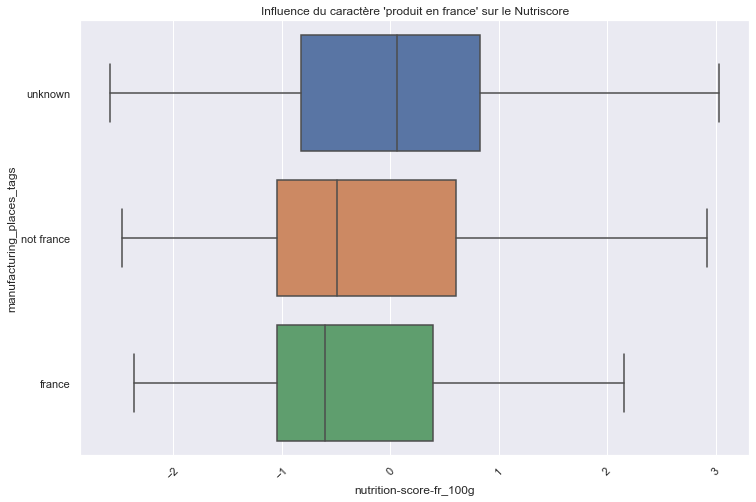

In [72]:
# Visualisation de la répartition des nutri-score en fonction du caractère 'produit en france' (1)
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=fabrication_mod_df4_complet, x='nutrition-score-fr_100g', y='manufacturing_places_tags')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence du caractère 'produit en france' sur le Nutriscore")
plt.show()


In [73]:
fabrication_mod_df4_complet.loc[fabrication_mod_df4_complet['manufacturing_places_tags'] == 'not france']

,code,countries_fr,manufacturing_places_tags,pnns_groups_1,pnns_groups_2,additives_n,carbohydrates_100g,energy_100g,fat_100g,fiber_100g,ingredients_that_may_be_from_palm_oil_n,proteins_100g,saturated-fat_100g,sodium_100g,sugars_100g,nutrition-score-fr_100g,nutrition-score-fr_100g x 1000,segment
74,290616,canada,not france,fruits and vegetables,vegetables,-0.849145,-0.346215,0.183618,0.071930,-0.066546,-0.206947,2.075098,0.463050,0.371509,-0.765807,-0.268613,-268.612988,c
75,394710,canada,not france,sugary snacks,biscuits and cakes,3.464794,0.763463,0.621372,0.249522,-0.049020,4.008747,-0.317792,0.407973,-0.087559,0.708454,0.941404,941.404369,e
76,1938067,canada,not france,sugary snacks,biscuits and cakes,1.307824,0.213976,0.014165,-0.024266,-0.066546,-0.206947,-0.520792,-0.366436,-0.189365,0.530073,0.061392,61.391745,d
77,4302544,canada,not france,unknown,unknown,-0.849145,0.734918,0.113013,-0.733892,0.010569,-0.206947,0.406610,-0.642986,0.135848,-0.707571,-0.818621,-818.620878,b
78,8237798,canada,not france,composite foods,pizza pies and quiche,0.445036,-0.886424,-0.850046,-0.313592,-0.642458,-0.206947,-0.238539,-0.223764,-0.244981,-0.728347,-0.708619,-708.619300,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162568,9556587103869,france,not france,cereals and potatoes,bread,-0.417751,0.310315,0.323417,0.293919,1.510812,-0.206947,-0.149553,0.794845,-0.095731,-0.498236,0.171393,171.393323,d
162573,9578181777048,espagne,not france,unknown,unknown,-0.849145,-1.120491,2.882160,5.244287,-0.732542,-0.206947,-0.830853,0.960742,-0.057194,-0.765807,1.491412,1491.412259,e
162576,96069868,royaume-uni,not france,fish meat eggs,fish and seafood,-0.849145,-1.166877,-0.898058,-0.779030,-0.767595,-0.206947,2.492220,-0.698230,-0.146946,-0.765807,-1.038624,-1038.624034,b
162578,96092514,royaume-uni,not france,fat and sauces,dressings and sauces,-0.417751,-0.938518,1.455929,3.127986,-0.592333,-0.206947,-0.747428,-0.067821,0.219743,-0.487743,0.941404,941.404369,e


# Pitch de l'application SainChauvin

A la lumière de toutes ces analyses, nous choissions de répondre à l'appel de Santé Publique France en proposant l'application SainChauvin.

L'utilisateur scanne un produit. L'application affiche le nutriscore/nutrigrade du produit : s'il a été renseigné dans la base de données, tant mieux ; sinon l'application vient le construire par une méthode de K-NN Imputer.

Ensuite, l'application propose deux alternatives, si elles existent : La première est un produit similaire distribué en France (d'un point de vue catégorique) avec un meilleur nutriscore, voir le meilleur nutriscore. Si notre utilisateur ne trouve pas cet alternative dans le rayon, il peut cliquer sur le bouton 'autre' pour obtenir un nouveau produit de même catégorie, avec un nutriscore inférieur (mais toujours meilleur que celui du produit scanné initialement).

La deuxième alternative concerne un produit de même catégorie, obligatoirement produit en France, avec un nutriscore plus élevé s'il existe. Sinon, l'application renvoie un produit similaire, quitte à ce qu'il ait un nutriscore d'une catégorie inférieure, mais produit en France.